# **Using Deep AutoVIML for tabular dataset - churn dataset**

## **Main References:**
* https://www.youtube.com/watch?v=IcpwNNNXsWE
* Dataset: https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv
* https://github.com/srivatsan88/YouTubeLI/blob/master/AutoViML.ipynb

In [1]:
!pip install deep_autoviml --upgrade

     |████████████████████████████████| 139 kB 5.0 MB/s 
     |████████████████████████████████| 454.4 MB 9.0 kB/s 
     |████████████████████████████████| 170 kB 68.9 MB/s 
     |████████████████████████████████| 308 kB 54.4 MB/s 
     |████████████████████████████████| 14.5 MB 32 kB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 4.3 MB 41.7 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 4.0 MB 40.2 MB/s 
     |████████████████████████████████| 462 kB 56.7 MB/s 
     |████████████████████████████████| 209 kB 40.1 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 59.8 MB/s 
     |████████████████████████████████| 111 kB 53.2 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sh

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# import tensorflow as tf
# np.random.seed(42)
# tf.random.set_seed(42)
# from tensorflow.keras import layers
# from tensorflow import keras
# from tensorflow.keras.layers.experimental import preprocessing

from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [4]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [5]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [6]:
import urllib.request
churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [7]:
df = pd.read_csv(OUTPUT_FILE)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
train, test = train_test_split(df, test_size=0.33, random_state=42)
print(train.shape, test.shape)

(4718, 21) (2325, 21)


* The storm tuner is an open source library used to build the model, with keras_model_type as "auto".
* Trying a CNN model for keras_model_type is also allowed, on using these keywords, we can build a slightly better/different model
* max_trials should be a slightly higher number, using a very small number may not give the best results. The higher the trials, more models will be tried.


In [11]:
keras_model_type =  "auto" ## "fast" first, then "fast2", "auto", etc.
keras_options = {'early_stopping': True}
model_options = {'max_trials': 10, "tuner": "storm"}
target = "Churn"

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 4718 rows, 20 cols
Data Set columns info:
* customerid: 0 nulls, 4718 unique vals, most common: {'7938-OUHIO': 1, 

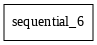


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.9008863819500403}
    original datasize = 4718, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 49
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 5000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 49, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting valida

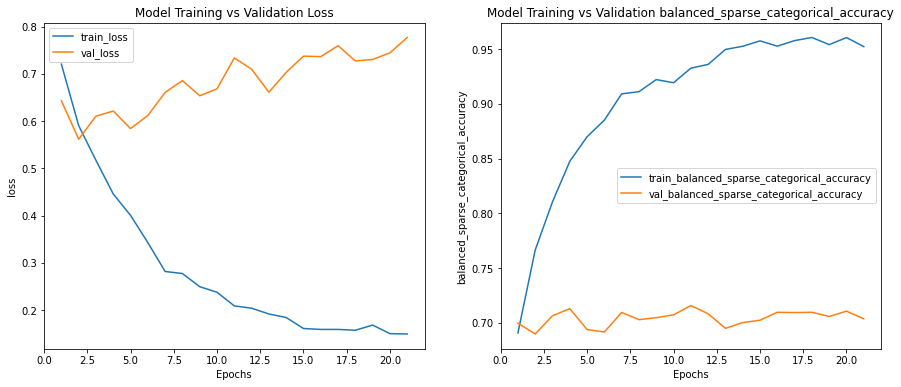

Time taken to train model (in mins) = 3
    Stopped epoch = 11
Held out data actuals shape: (480,)
    samples from label: [0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

Held out predictions shape:(480,)
    Sample predictions: [1 0 0 1 0 1 0 0 0 0]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Churn
#################################################################


    Accuracy          = 72.9%
    Balanced Accuracy = 71.1%
    Precision         = 47.1%
    Average Precision = 67.2%
    Recall            = 67.5%
    F1 Score          = 55.5%
    ROC AUC           = 75.9%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.00073163834
    set learning rate using best model: 0.00073163834
    max epochs for training = 11

Model not being saved since save_model_flag set to False...
6442

Saving vocab dictionary using pickle in test/auto/model_2021_11_01-17_00_33/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in test/auto/model_2021_11_01-17_00_33/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in test/auto/model_2021_11_01-17_00_33/artifacts/var_df.pickle...will take time...
    Saved pickle file in test/auto/model_2021_11_01-17_00_33/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time take

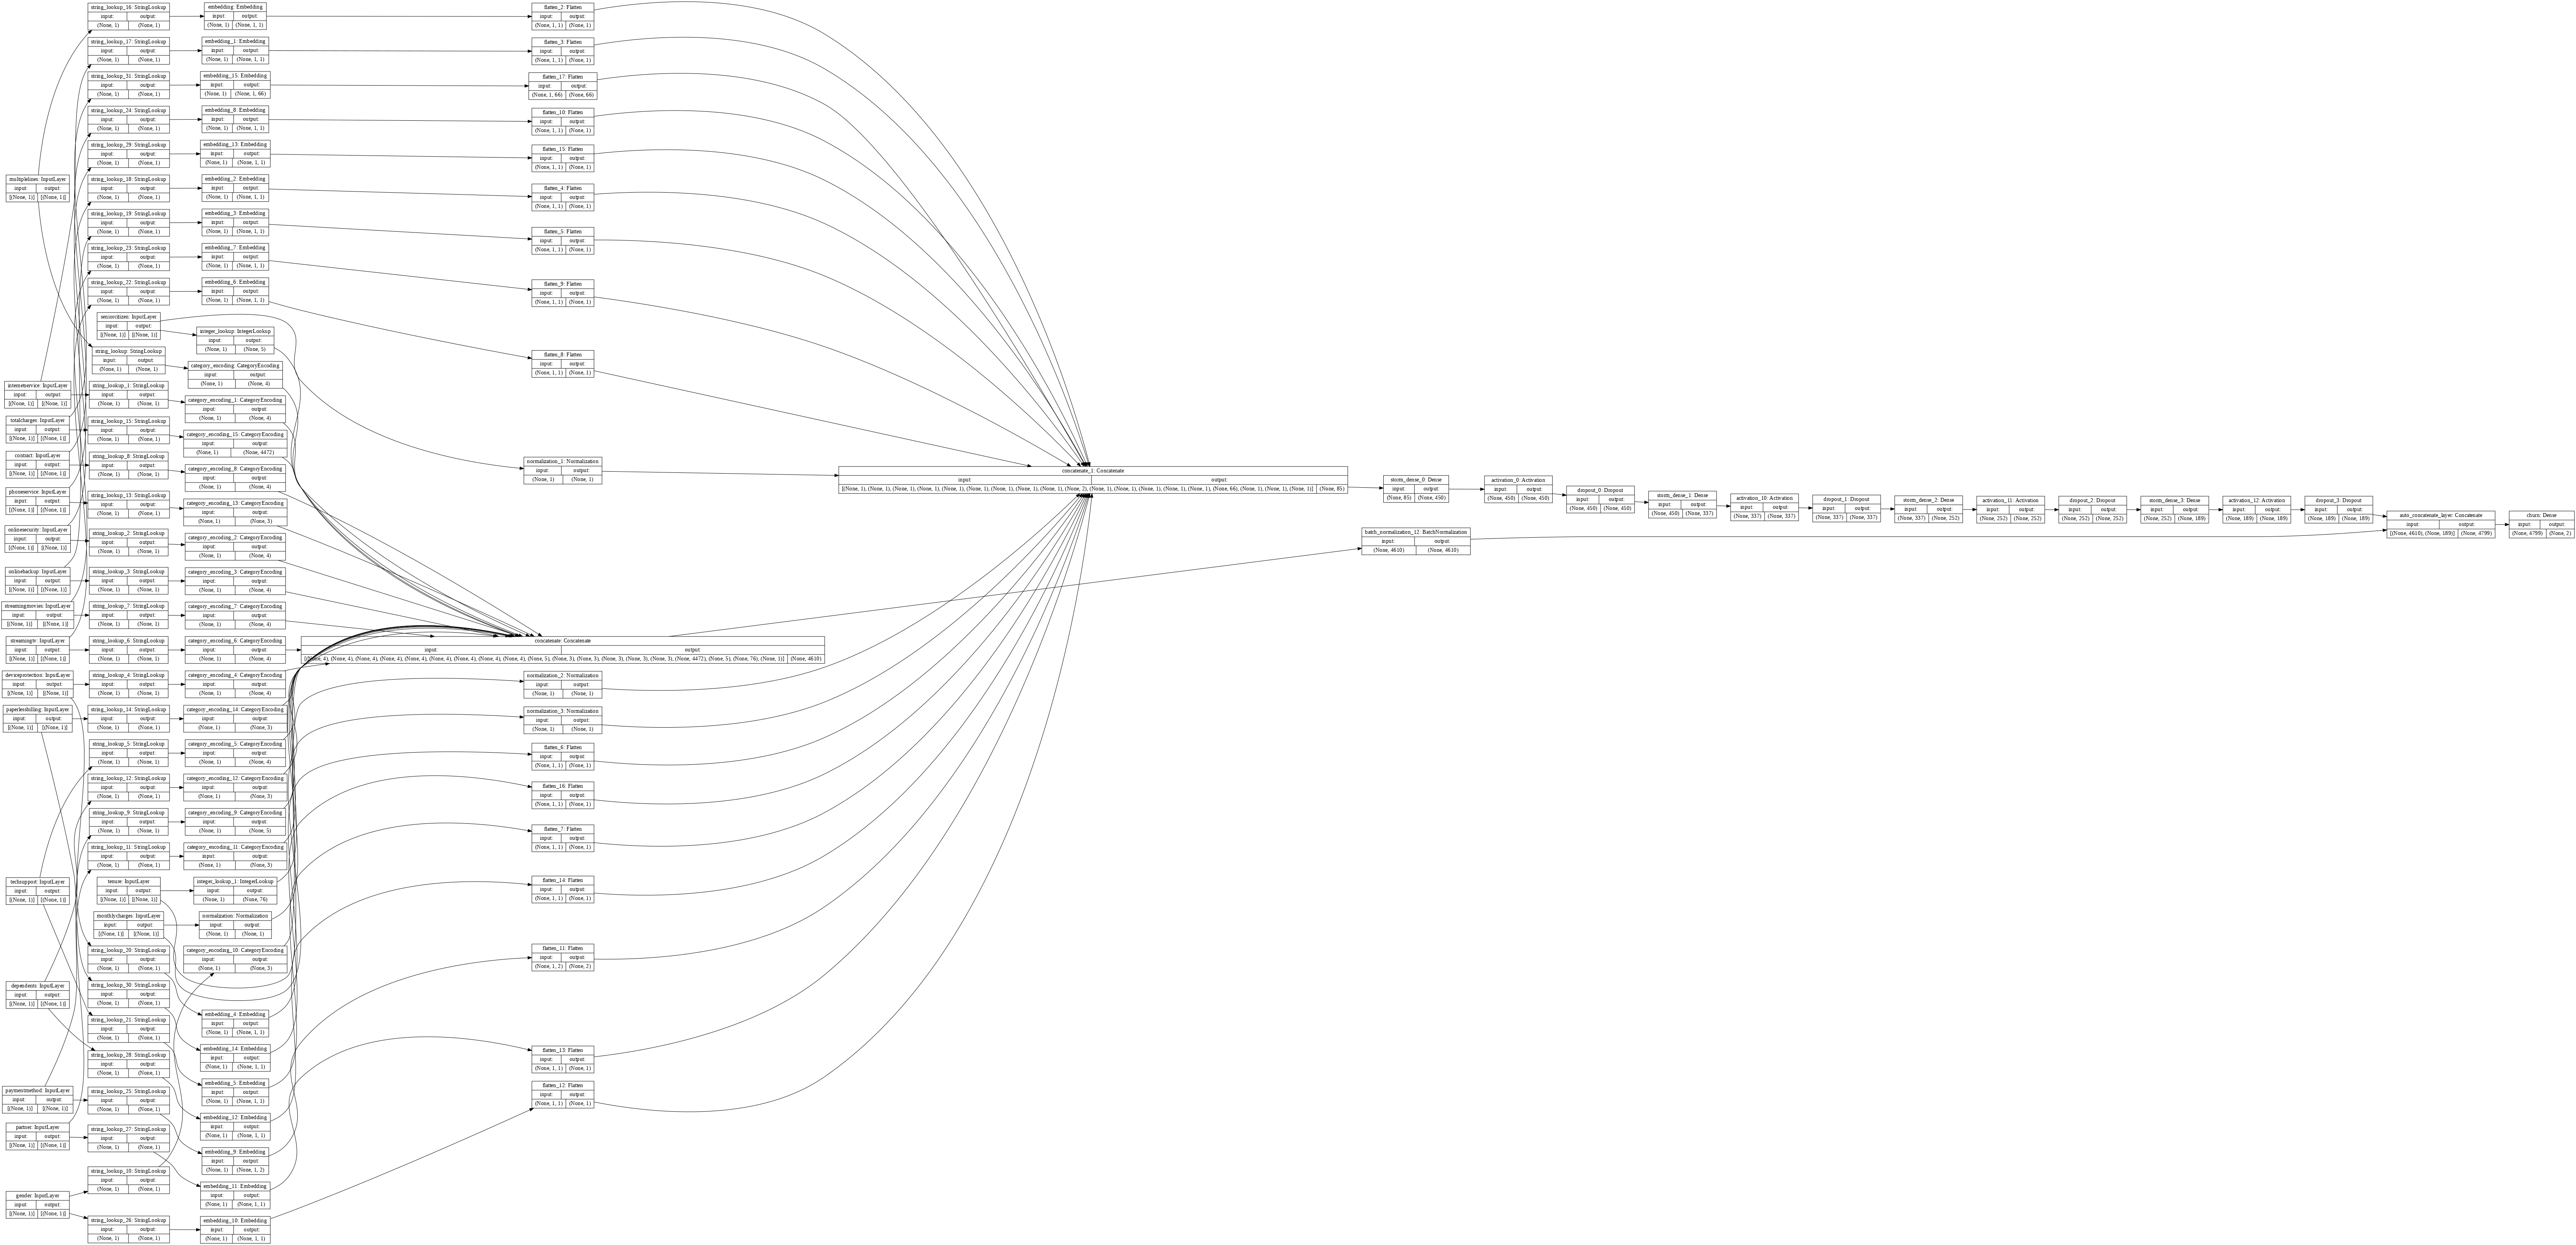

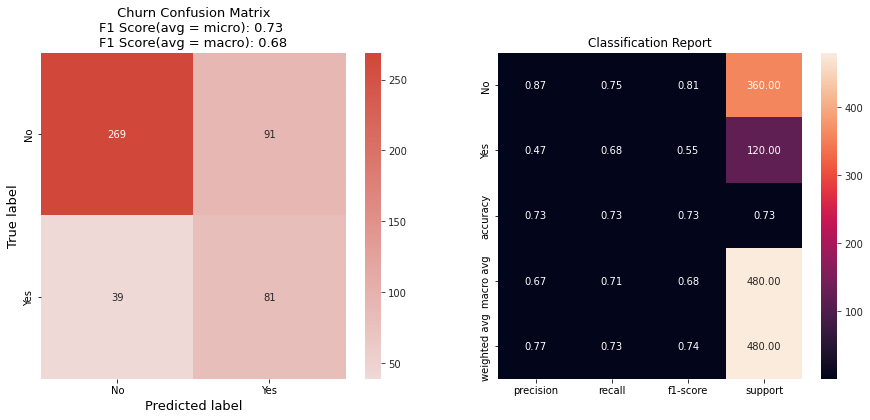

In [12]:
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type,
		project_name='test', keras_options=keras_options,  
		model_options=model_options, save_model_flag=False, use_my_model='', verbose=2)

The following steps are happens:
* It summarizes all the options we have specified.
* It loads the data
* Describes the columns of the data - which are numeric and which are categorical, tried to understand the vocab to understand what preprocessing is required.
* Performs preprocessing
* Recommends the number of layers if we want to customize it
* The storm tuner trains the keras model - for 10 trials, hyperparameters are tuned (Dropout, optimizer, number of layers in the model etc.)
* The best model is then picked.


In [13]:
predictions = deepauto.predict(model, project_name='test', test_dataset=test, keras_model_type=keras_model_type, 
                               cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x7fdf63245e10> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x7fdf63245e10> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 2325
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    21 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 6, cats = 10, high cats = 0, very high cats = 2
Distribution of integer columns in d

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test[target].values, predictions[1]))

              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1697
         Yes       0.66      0.51      0.57       628

    accuracy                           0.80      2325
   macro avg       0.75      0.71      0.72      2325
weighted avg       0.79      0.80      0.79      2325



## **CONCLUSION:**
The average accuracy achieved by the model is 72% with the Survived='NO' class accuracy being 87% and 'YES' being 57%